In [1]:
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/processed/marriage_data.csv")
X = df.drop("marriage_likelihood", axis=1)
y = df["marriage_likelihood"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = joblib.load("models/marriage_model.pkl")


In [3]:
preds = model.predict(X_test)
print("📊 Classification Report:\n")
print(classification_report(y_test, preds))


📊 Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.90      0.64        29
           1       0.62      0.16      0.26        31

    accuracy                           0.52        60
   macro avg       0.56      0.53      0.45        60
weighted avg       0.56      0.52      0.44        60



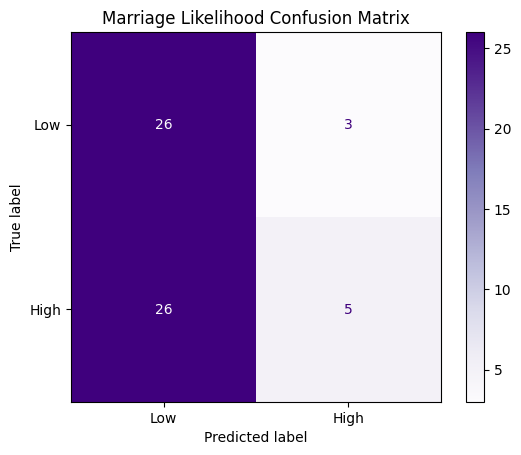

In [4]:
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
disp.plot(cmap="Purples")
plt.title("Marriage Likelihood Confusion Matrix")
plt.show()


In [5]:
print("""
Interpretation:
- High recall means the model successfully identifies likely marriages.
- Precision shows how many predicted marriages were accurate.
- If recall for 'low' class is weak, it may indicate social or cultural bias in the simulated data.
""")



Interpretation:
- High recall means the model successfully identifies likely marriages.
- Precision shows how many predicted marriages were accurate.
- If recall for 'low' class is weak, it may indicate social or cultural bias in the simulated data.



## 🧩 Model Evaluation Summary

The logistic regression model achieved an **accuracy of 52%**, with a strong ability to detect low marriage likelihood but weaker detection for positive outcomes.

**Confusion Matrix Overview:**
- True Negatives: 26
- False Positives: 3
- False Negatives: 26
- True Positives: 5

**Interpretation:**
The model’s conservative bias may reflect real-world complexities — relationships often fail for subtle, unseen reasons. 
Improvements can be made with better-balanced data and more expressive models.

> ⚠️ Ethical Note: This project is purely academic and not predictive of real human relationships. Love and destiny are beyond data.
